In [1]:
import pandas as pd

df = pd.read_csv("azureml://subscriptions/b14295b0-e8a8-4930-a943-b4fc64c5a893/resourcegroups/TEAM9DBDA/workspaces/Model_building/datastores/datastore/paths/Cleaned_Data/heart_disease_cleaned.csv")
df.head()

age  sex     chest  resting_blood_pressure  serum_cholestoral  \
0  55.831112  1.0  3.000000              140.313770         192.746405   
1  38.916715  1.0  4.000000              108.690853         335.235804   
2  56.372500  0.0  2.533979              169.804177         243.375327   
3  58.098182  1.0  4.000000              140.485476         212.240426   
4  65.139437  0.0  4.000000              174.228383         227.901419   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                  0.0                                   2.0   
1                  0.0                                   0.0   
2                  0.0                                   0.0   
3                  0.0                                   1.0   
4                  1.0                                   2.0   

   maximum_heart_rate_achieved  exercise_induced_angina   oldpeak  slope  \
0                   148.757357                      0.0  0.969541    1.0   
1                   181.776830                      0.0  0.367099    2.0   
2                   155.694697                      0.0  0.000000    1.0   
3                   105.185315                      1.0  0.000000    1.0   
4                   145.159292                      1.0  0.000000    2.0   

   number_of_major_vessels  thal  class  
0                      0.0   3.0      0  
1                      0.0   3.0      0  
2                      0.0   3.0      0  
3                      1.0   3.0      1  
4                      0.0   7.0      1

In [3]:
%pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

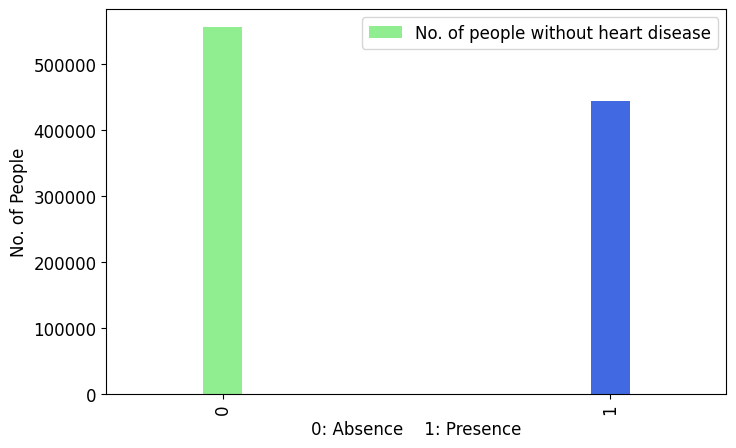

In [3]:
df['class'].value_counts().plot(kind="bar",width=0.1,color=["lightgreen","royalblue"],legend=1,figsize=(8,5))
plt.xticks(fontsize=12)
plt.xlabel("0: Absence    1: Presence", fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("No. of People", fontsize=12)
plt.legend(["No. of people without heart disease"],fontsize=12);
plt.show()

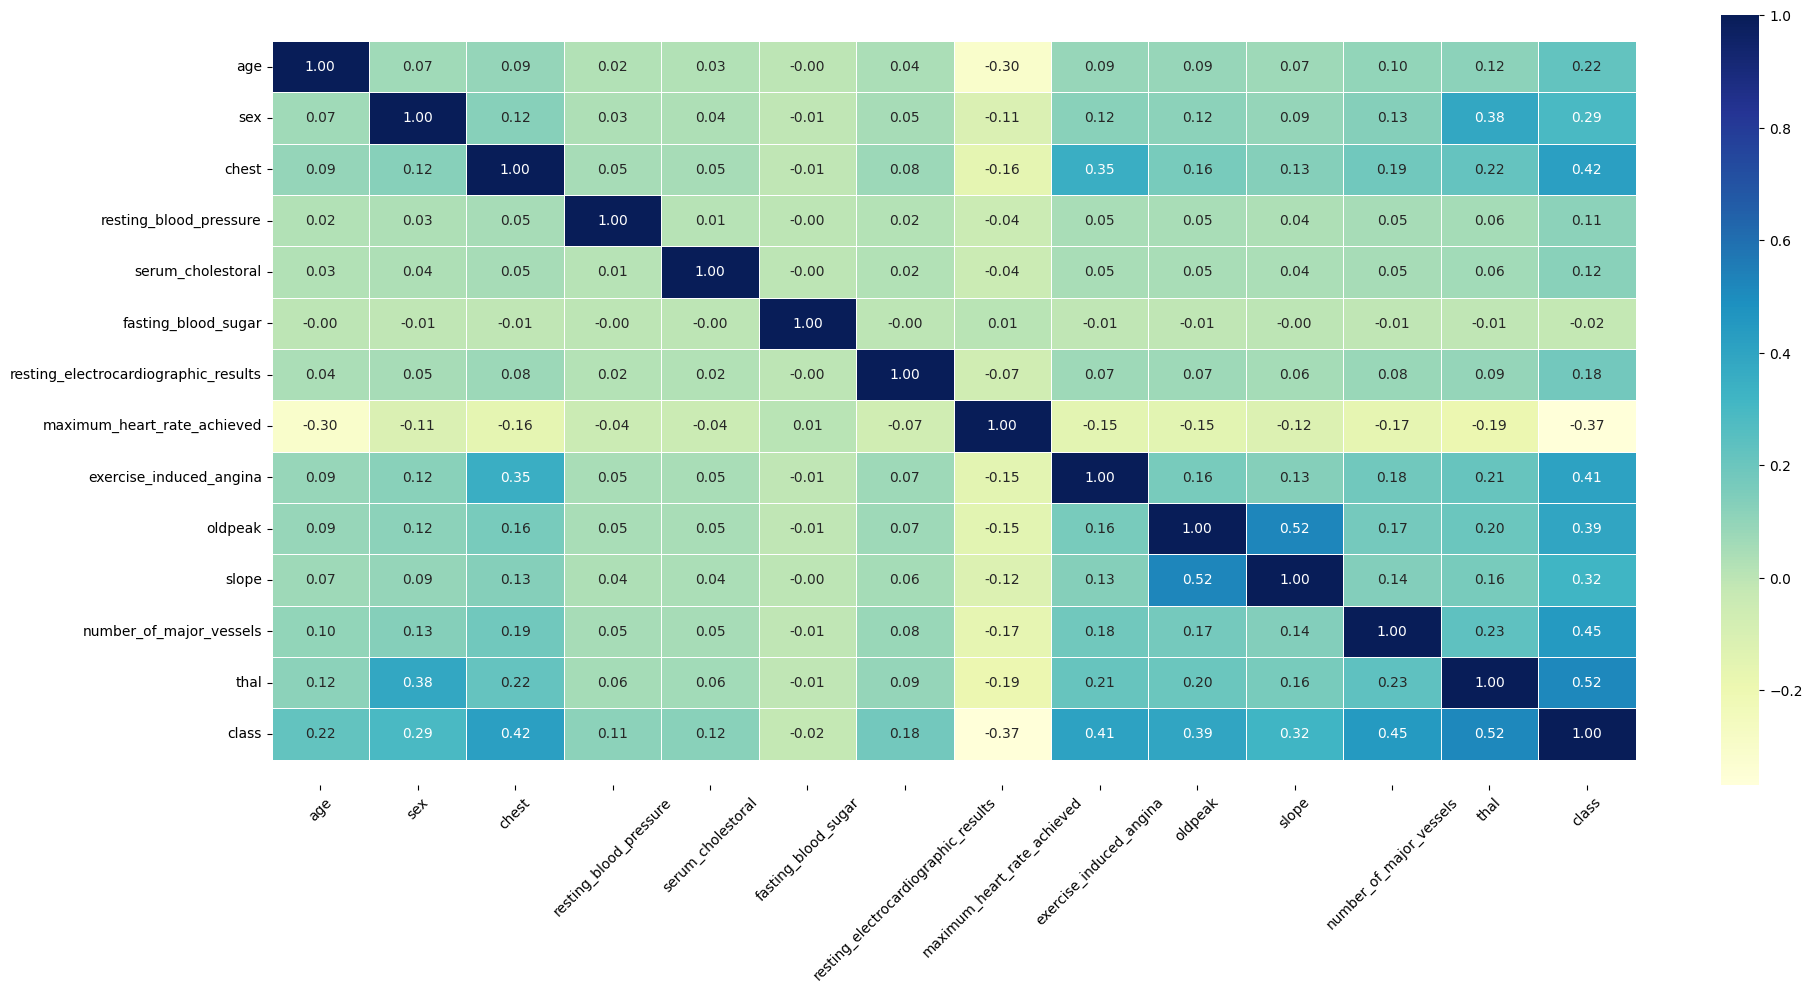

In [4]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.xticks(rotation=45);

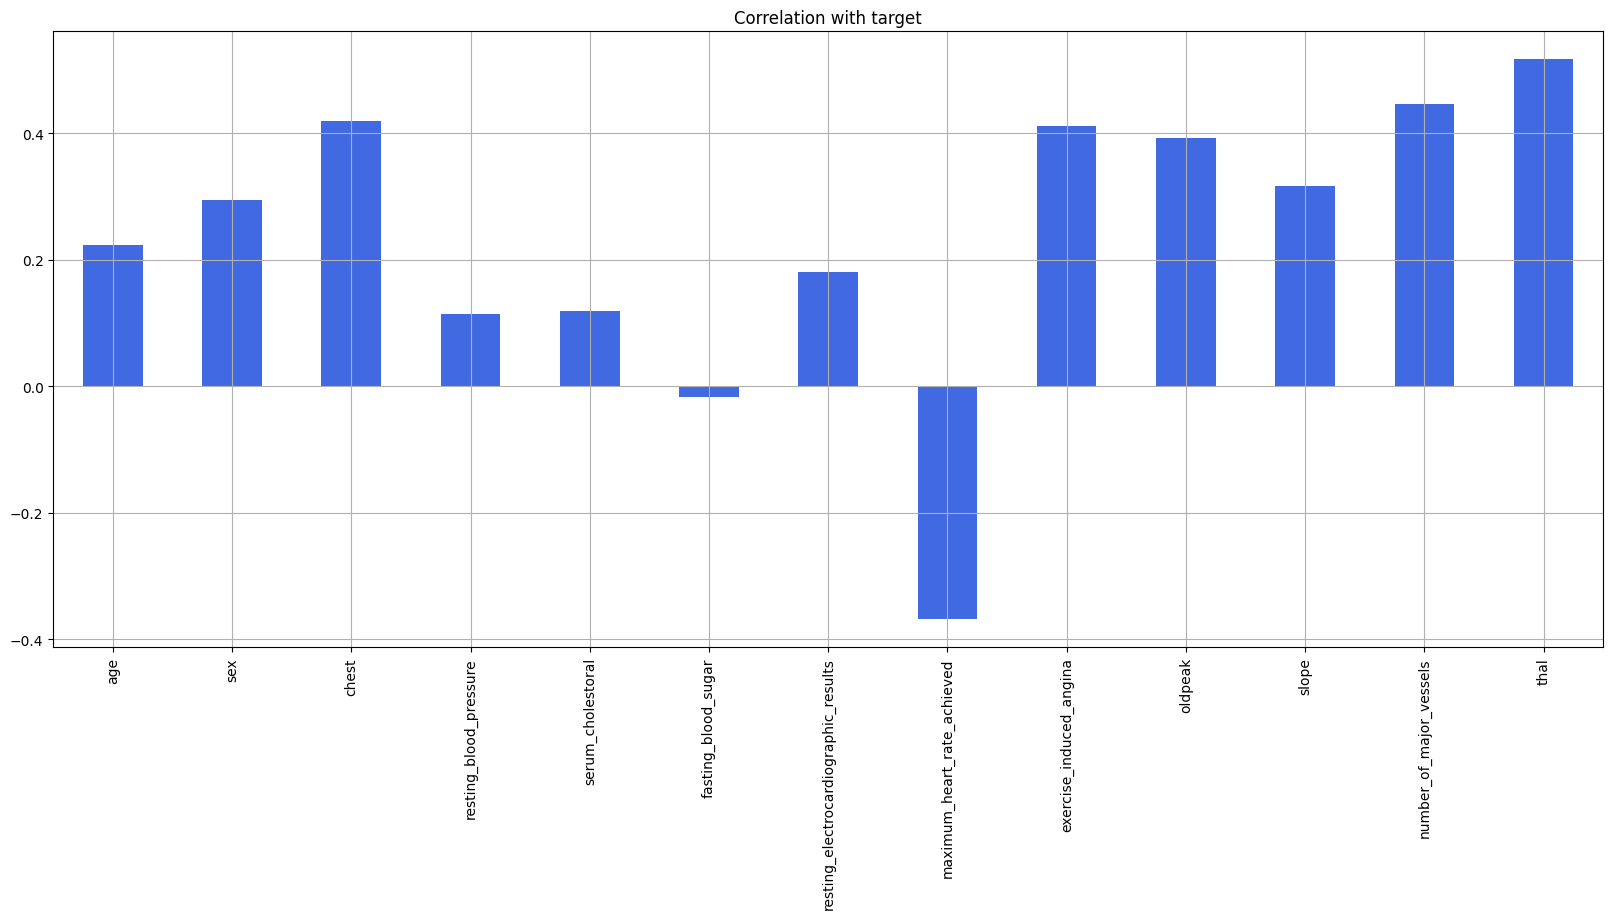

In [5]:
df.drop('class', axis=1).corrwith(df['class']).plot(kind='bar',
                                                                     grid=True,
                                                                     figsize=(20, 8),
                                                                     title="Correlation with target",
                                                                     color="royalblue");

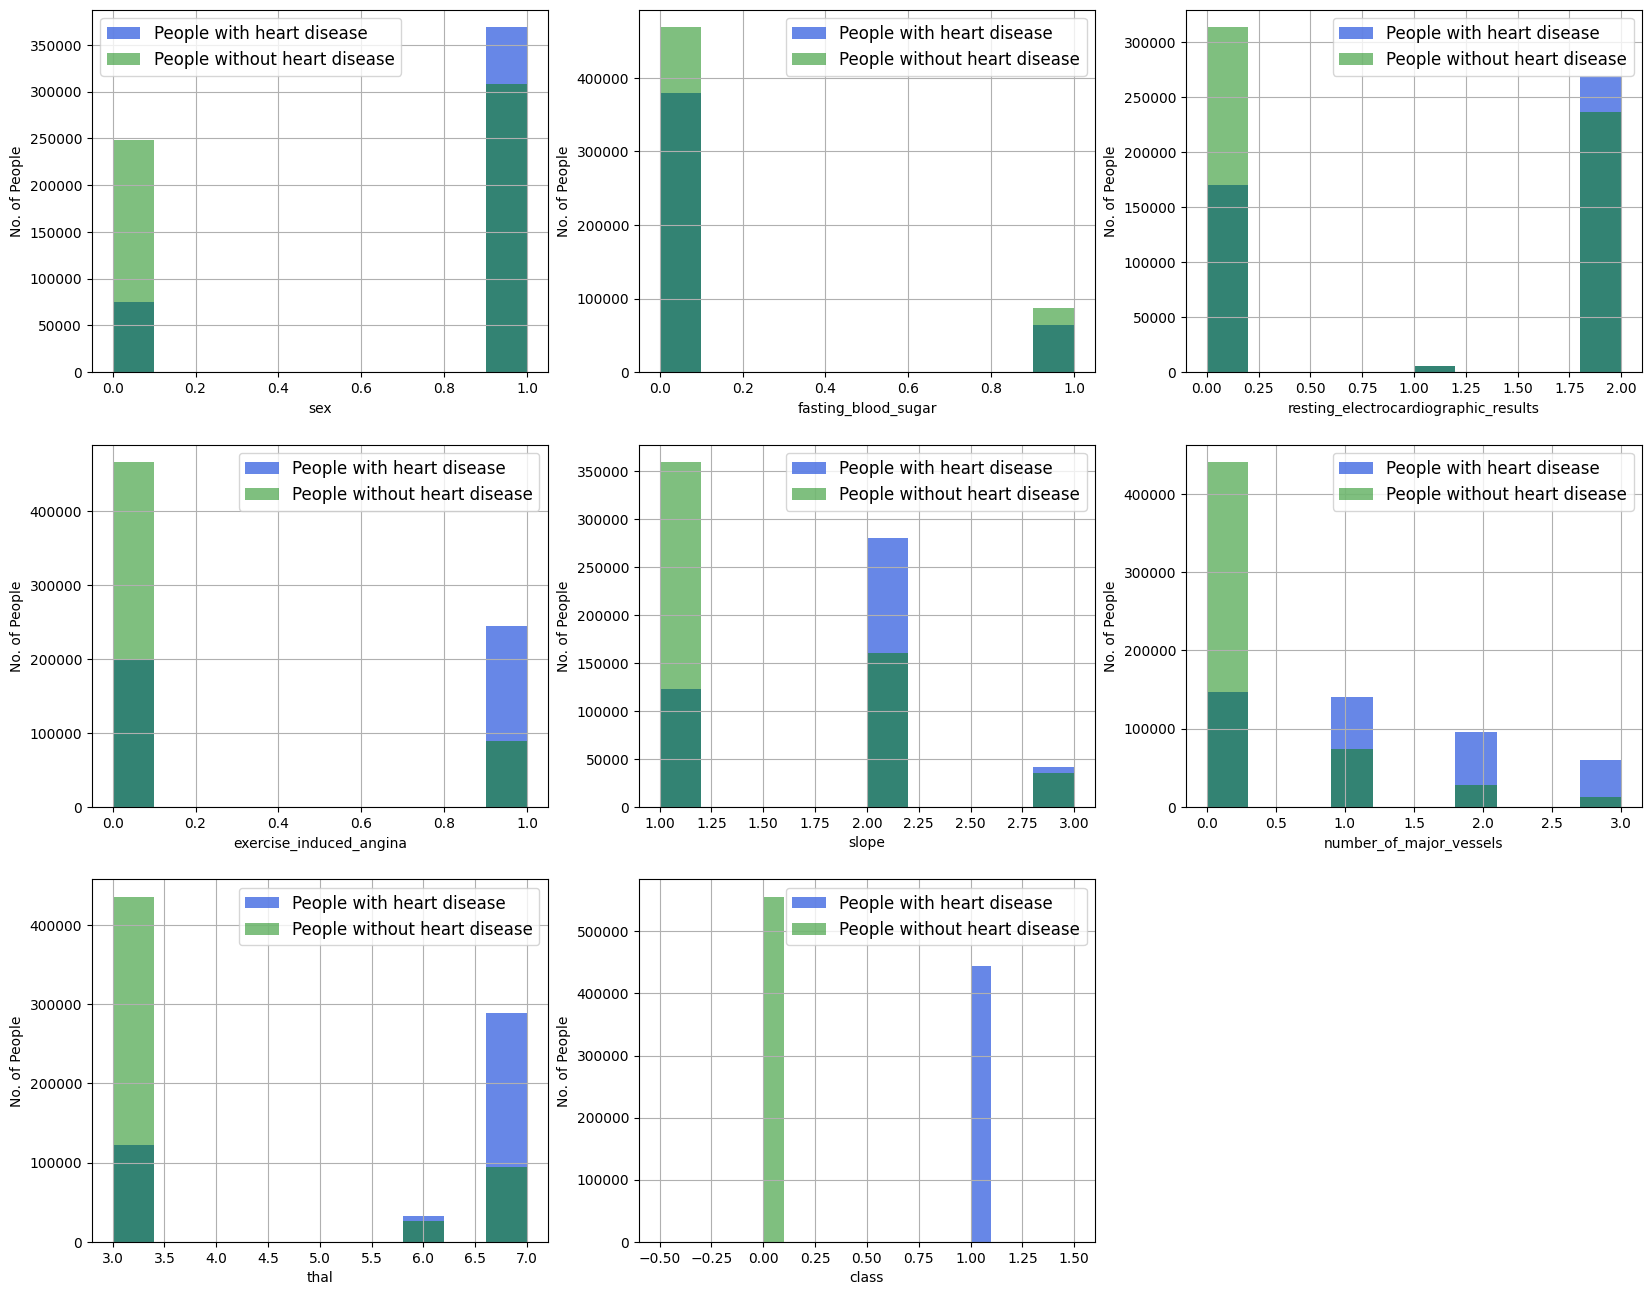

In [7]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["class"] == 1][column].hist(bins=10, color='royalblue', label='People with heart disease',alpha=0.8)
    df[df["class"] == 0][column].hist(bins=10, color='green', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

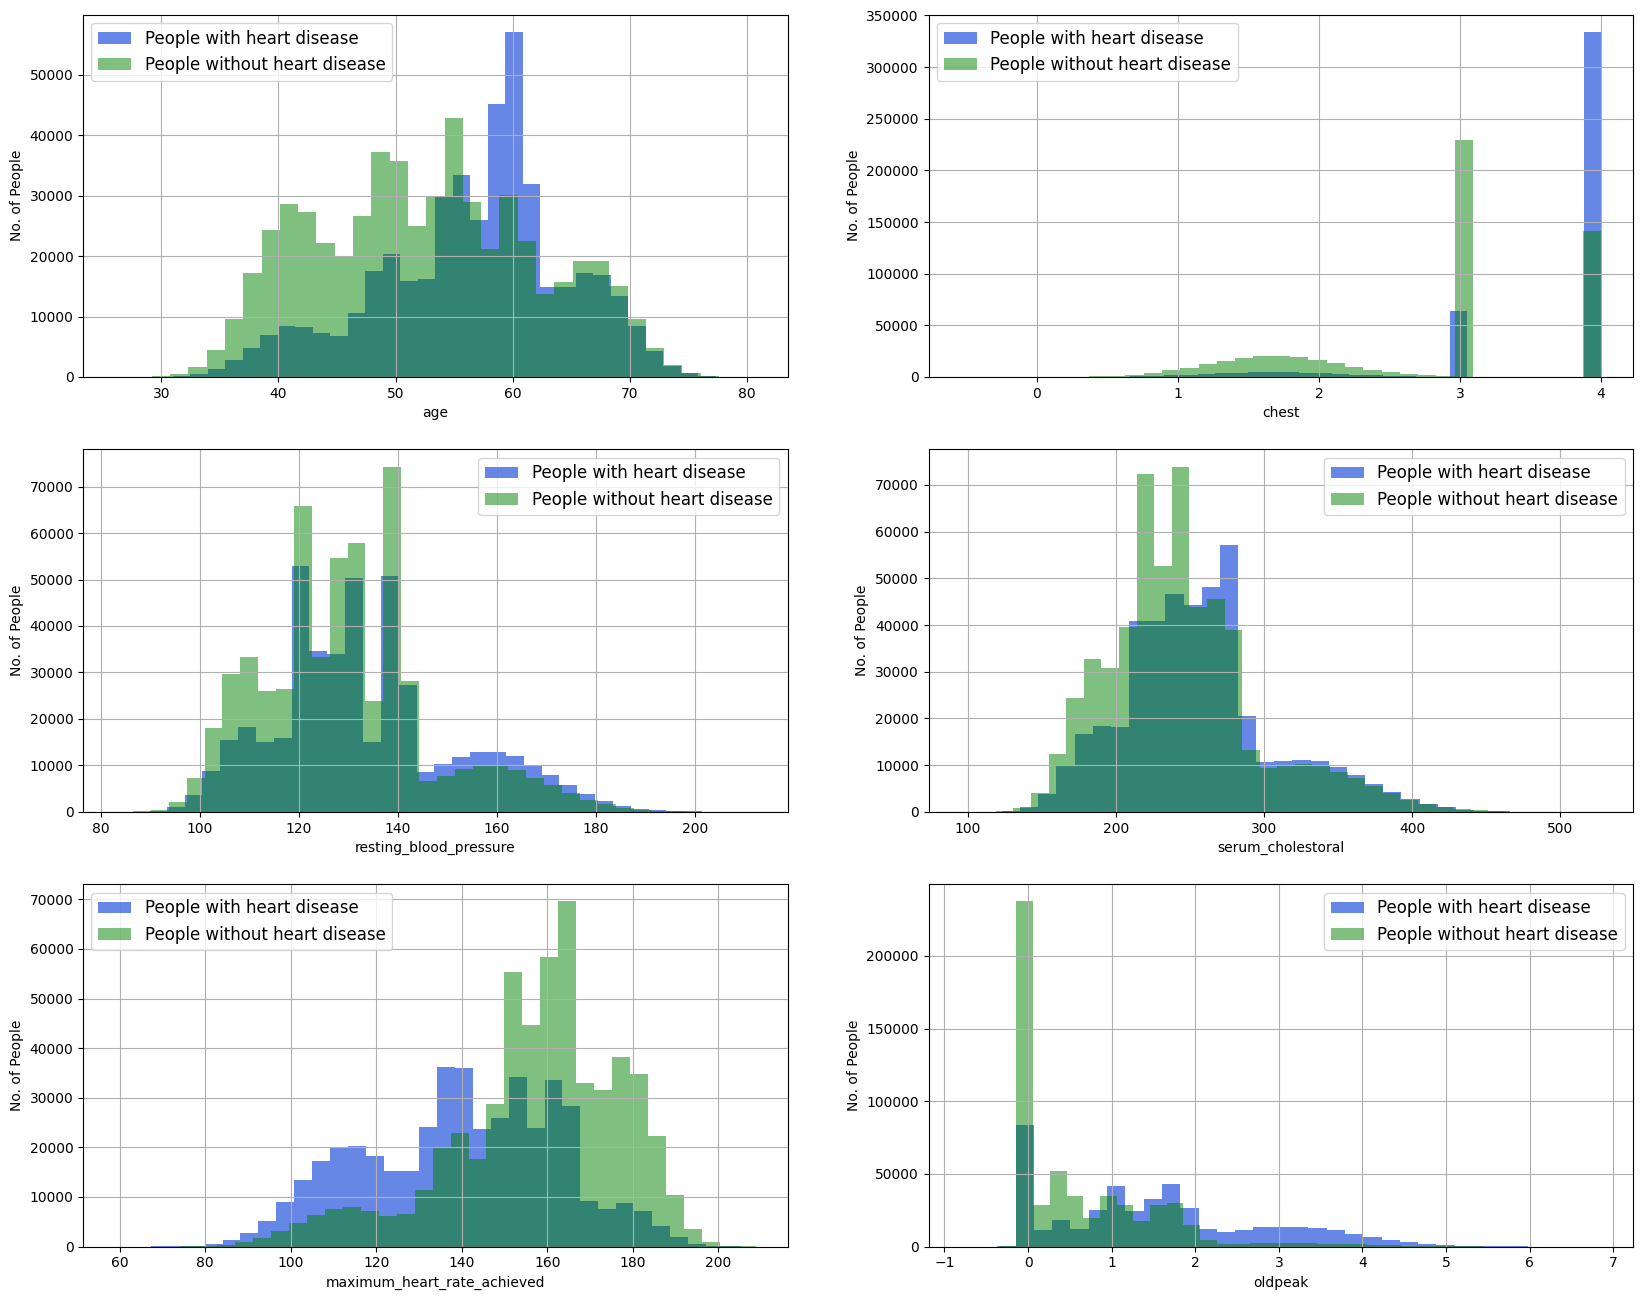

In [8]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["class"] == 1][column].hist(bins=35, color='royalblue', label='People with heart disease', alpha=0.8)
    df[df["class"] == 0][column].hist(bins=35, color='green', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

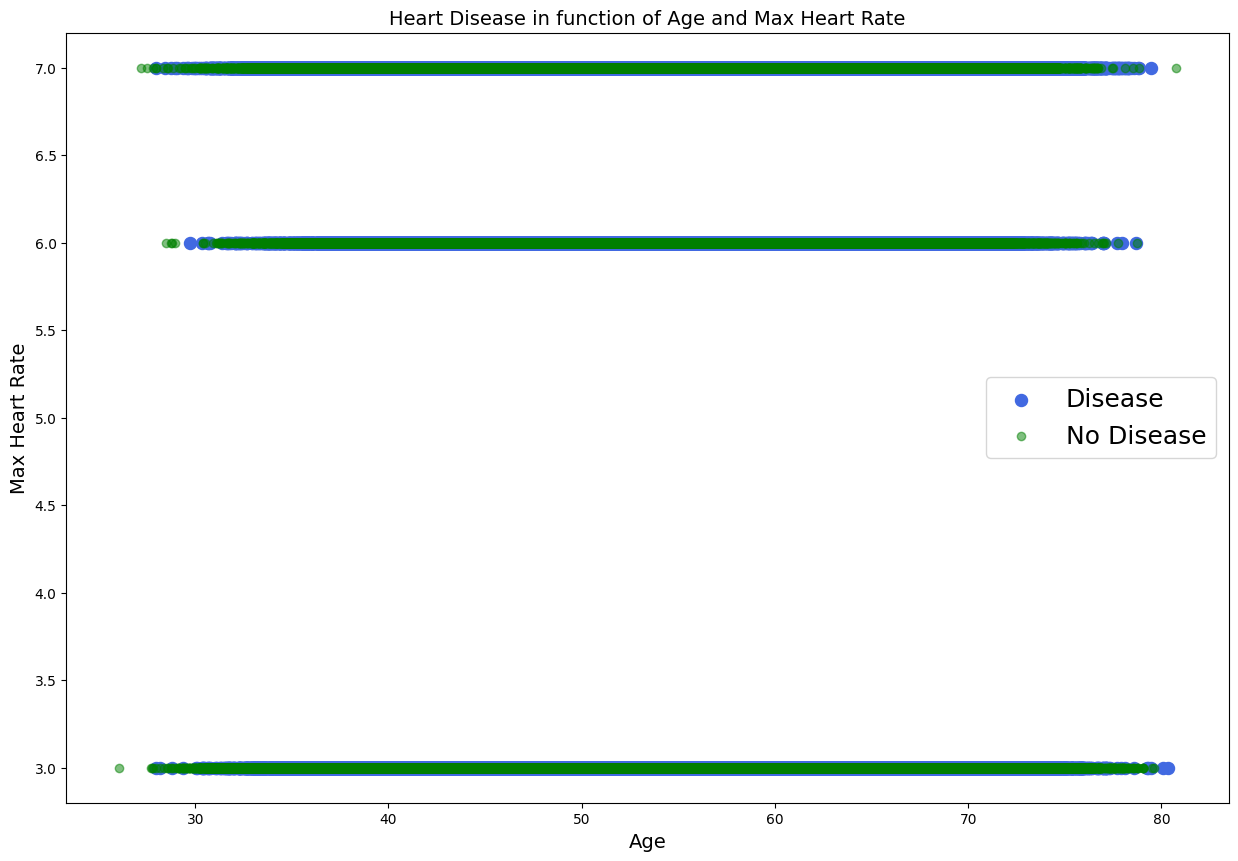

In [9]:
# prompt: apply the SCATTER PLOT (Age Vs Max Heart Rate)

plt.figure(figsize=(15, 10))
plt.scatter(df['age'][df['class']==1],df['thal'][df['class']==1],c="royalblue",s=75)
plt.scatter(df['age'][df['class']==0],df['thal'][df['class']==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Max Heart Rate",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Max Heart Rate", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

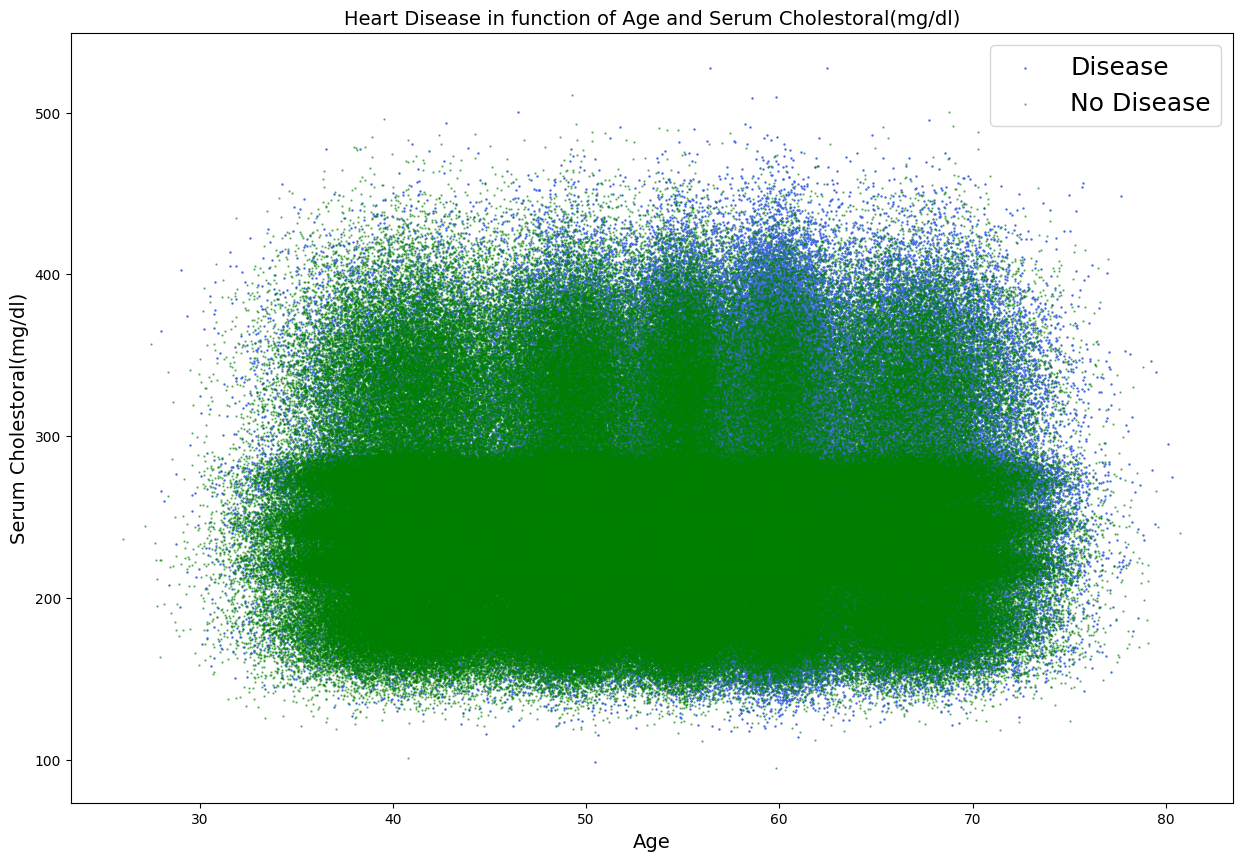

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(df['age'][df['class']==1],df['serum_cholestoral'][df['class']==1],c="royalblue",s=0.5)
plt.scatter(df['age'][df['class']==0],df['serum_cholestoral'][df['class']==0],c="green",alpha=0.5, s=0.5)
plt.title("Heart Disease in function of Age and Serum Cholestoral(mg/dl)",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Serum Cholestoral(mg/dl)", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


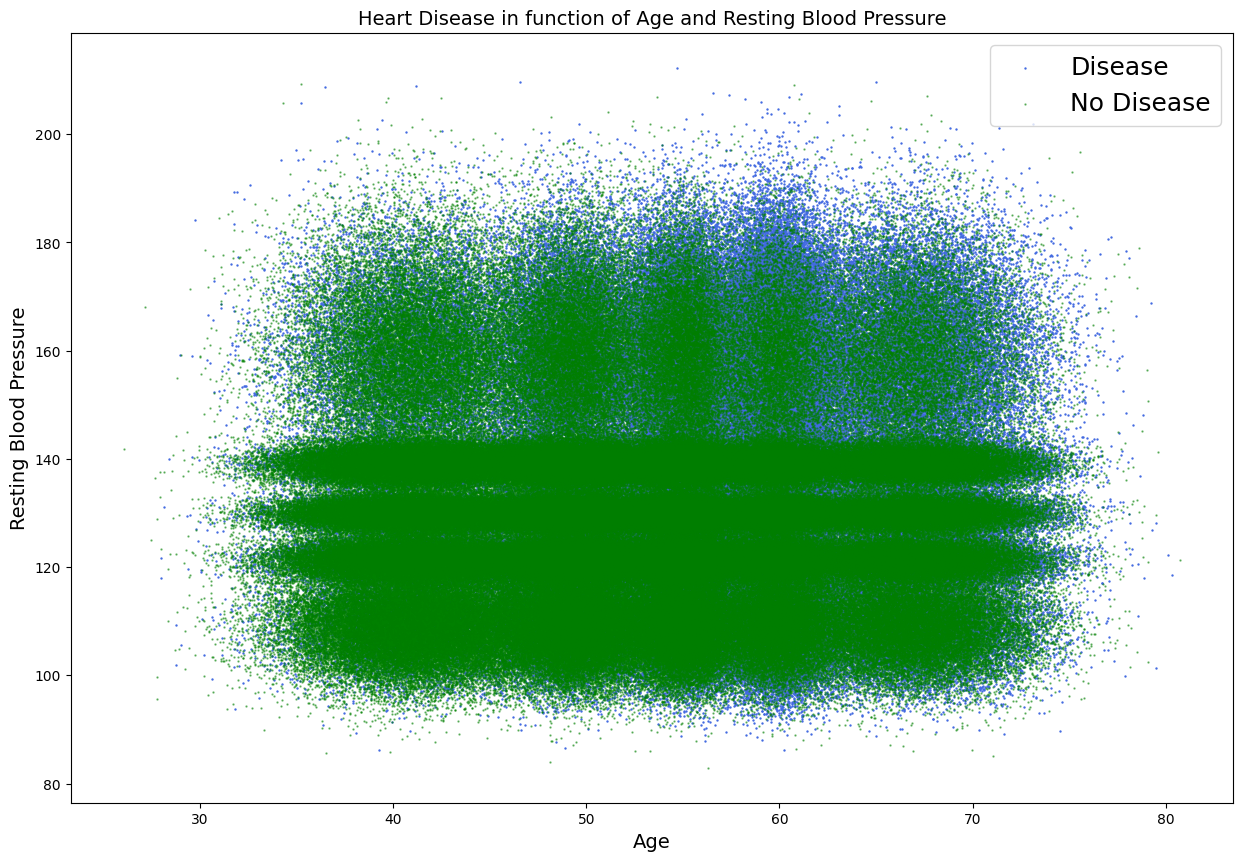

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(df['age'][df['class']==1],df['resting_blood_pressure'][df['class']==1],c="royalblue",s=0.5)
plt.scatter(df['age'][df['class']==0],df['resting_blood_pressure'][df['class']==0],c="green",alpha=0.5, s=0.5)
plt.title("Heart Disease in function of Age and Resting Blood Pressure",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Resting Blood Pressure", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

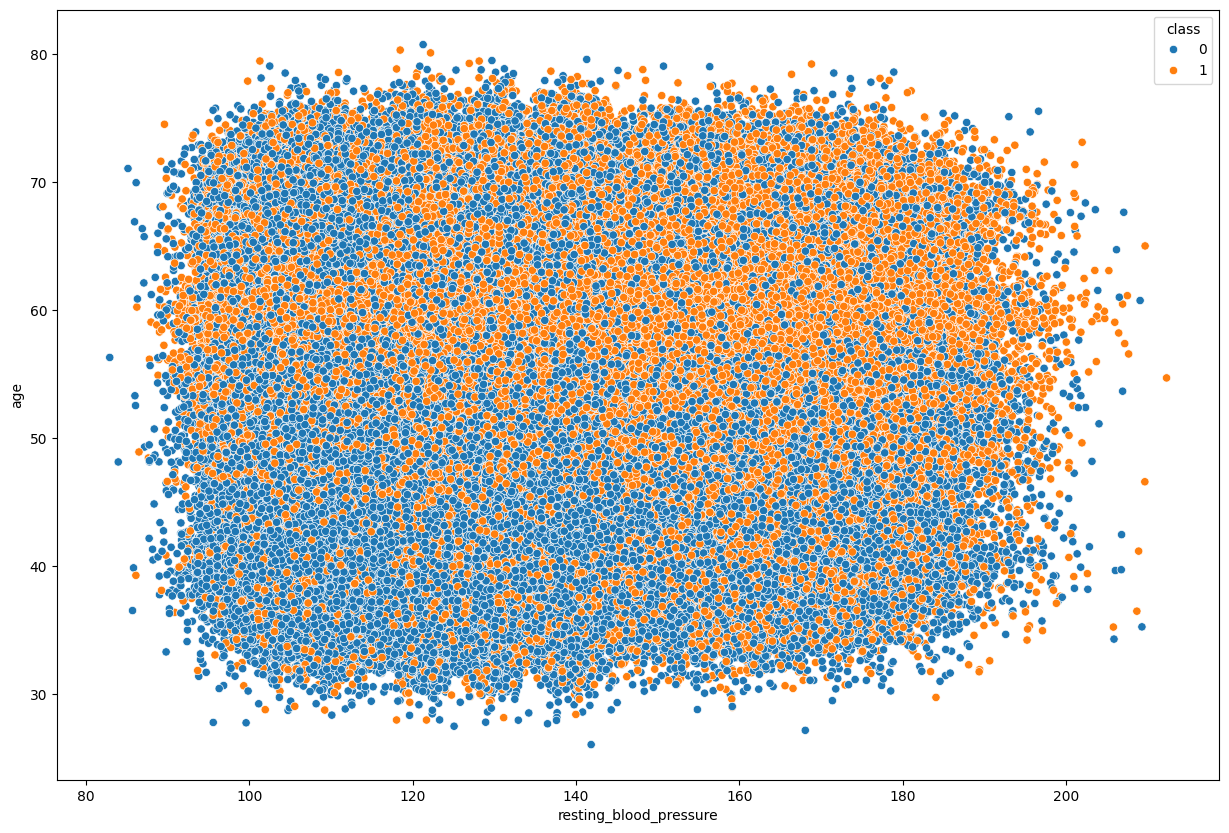

In [12]:
# prompt: changing color in sns.scatterplot

plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'class', data = df, color="royalblue")


<Axes: xlabel='class', ylabel='age'>

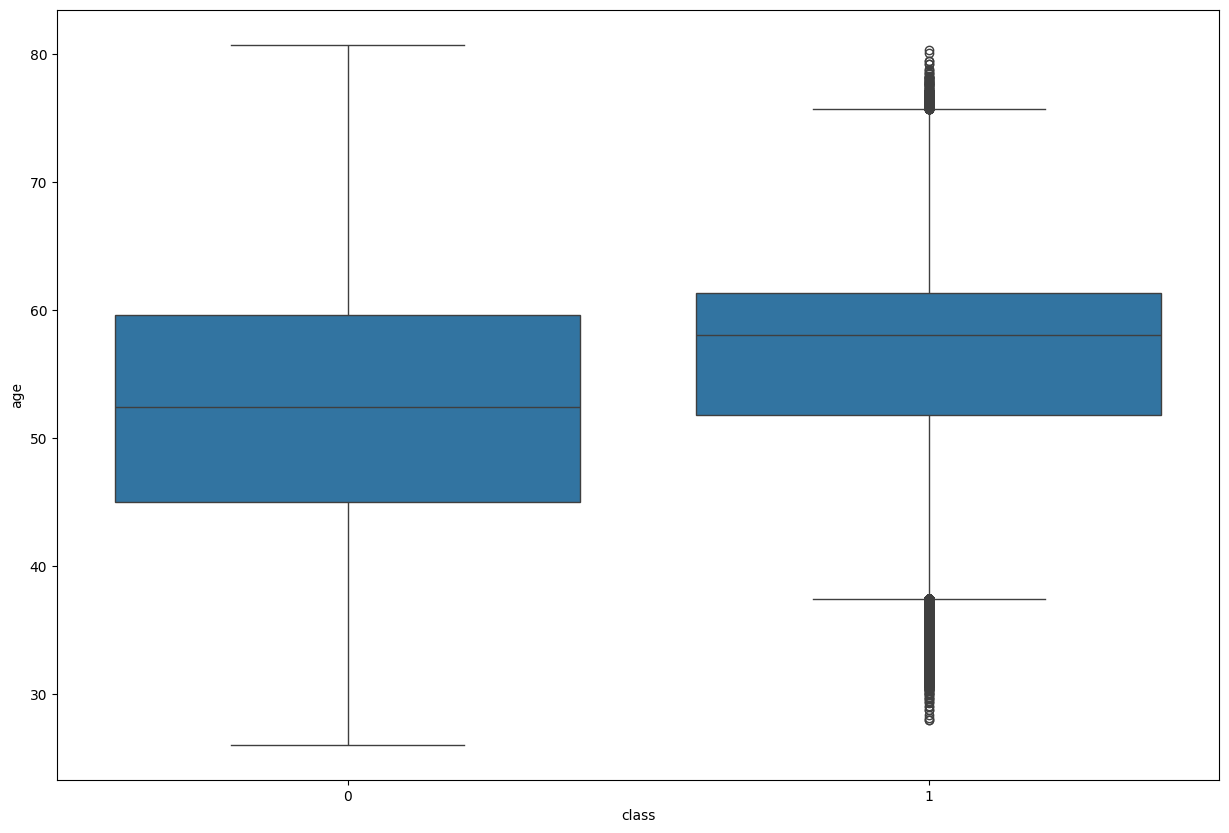

In [13]:
# prompt: draw boxplot of age and class column
plt.figure(figsize=(15, 10))

sns.boxplot(x = 'class', y = 'age', data = df)